In [1]:
import subprocess
import numpy as np
import healpy as hp
import pickle
from random import randint
import joblib
import sklearn
import sys
import astropy
import h5py
import importlib
import os

from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt

In [ ]:
sys.path.append('/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/methods_code_Nresol/')
from utils_circpatch import *
import do_recon_tilewise
import methods_cluster
import run_fullsky
sys.path.append('/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/utils/')
import testbeds
nmdir='../notebooks_main1/'

### NSCombined

In [ ]:
NSIDETILE = 32
NSIDERESOL = 2048
pix2kall = testbeds.get_testbed_dict('FullSky_Bayestar_babsgt19', Nresol=NSIDERESOL)['coords'] #north
latvalues = hp.pix2ang(NSIDERESOL, pix2kall, lonlat=True)[1]
northmask = latvalues>0
pix2knorth = pix2kall[northmask]
pix2ksouth = pix2kall[~northmask]

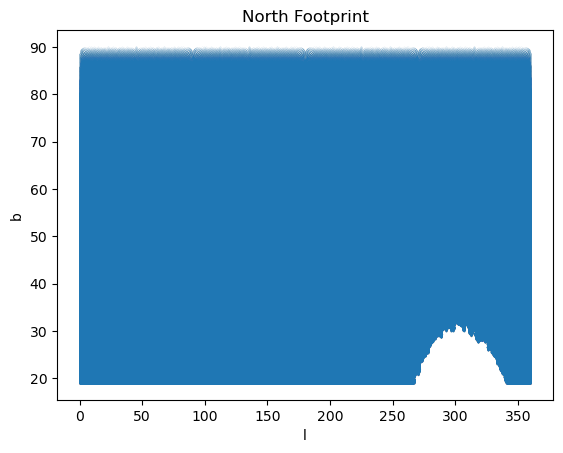

In [4]:
lbnorth = hp.pix2ang(NSIDERESOL, pix2knorth, lonlat=True)
plt.figure()
plt.scatter(lbnorth[0], lbnorth[1], s=0.001)
plt.xlabel('l')
plt.ylabel('b')
plt.title('North Footprint')
plt.show()

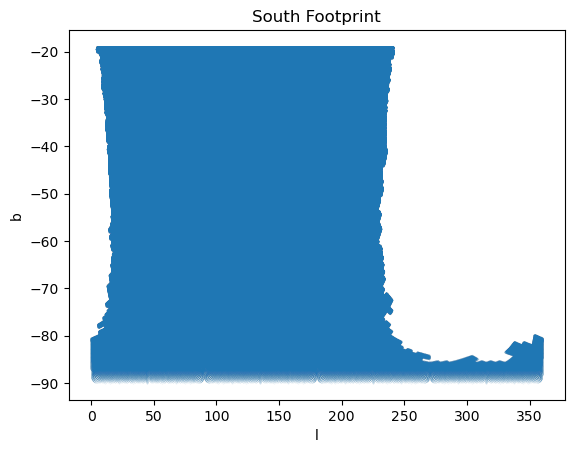

In [5]:
lbsouth = hp.pix2ang(NSIDERESOL, pix2ksouth, lonlat=True)
plt.figure()
plt.scatter(lbsouth[0], lbsouth[1], s=0.001)
plt.xlabel('l')
plt.ylabel('b')
plt.title('South Footprint')
plt.show()

In [6]:
input_dirnorth = '/n/holylfs05/LABS/finkbeiner_lab/Lab/nmudur/bayestar_edr3/input_fullsky/north/postprocessed/'
input_dirsouth = '/n/holylfs05/LABS/finkbeiner_lab/Lab/nmudur/bayestar_edr3/input_fullsky/south/postprocessed/'

tiles32n = np.unique(get_largepix_for_smallpix(pix2knorth, NSIDERESOL, NSIDETILE))
tiles32s = np.unique(get_largepix_for_smallpix(pix2ksouth, NSIDERESOL, NSIDETILE))

In [7]:
tiledictnorth = do_recon_tilewise.map_h5files_to_tiles_proper(input_dirnorth, tiles32n, Nsidetile=NSIDETILE)
tiledictsouth = do_recon_tilewise.map_h5files_to_tiles_proper(input_dirsouth, tiles32s, Nsidetile=NSIDETILE)

182
125
82
136
117
103
217
91
256
87
254
47
125
81
346
41
47
397
419
94
79
94
321
315
222
80
152
100
158
380
319
25
115
40
314
117
88
447
33
129
153
56
139
34
40
279
449
31
91
278
61
230
225
60
25
81
170
124
85
196
28
69
25
253
34
251
114
81
108
108
39
38
170
421
79
46
105
266
92
171
113
224
24
23
54
208
163
128
46
96
300
81
141
73
191
34
101
54
30
130
212
434
127
68
289
95
50
29
262
28
38
87
125
33
67
63
87
95
128
102
259
75
65
139
190
100
126
308
381
263
152
131
36
97
32
186
36
30
51
35
36
88
435
57
81
80
119
38
151
38
21
229
40
338
59
171
272
414
22
77
54
102
437
48
23
95
141
156
416
23
118
190
34
30
141
396
395
174
39
74
109
32
140
53
25
65
81
74
27
110
112
241
235
88
246
28
44
38
30
20
36
26
51
79
125
111
25
47
52
47
136
116
169
53
79
35
25
50
51
150
70
26
88
107
87
264
116
30
334
76
46
50
153
129
130
26
110
113
26
87
164
261
90
36
39
130
202
117
80
19
80
100
51
22
66
31
432
58
125
59
237
88
153
28
82
177
281
426
64
45
26
74
77
134
162
91
212
269
365
22
242
94
251
76
204
259
24
57

105
164
22
375
60
38
267
124
64
159
171
73
373
59
57
107
69
308
428
50
55
343
29
273
74
220
180
91
138
77
281
66
318
440
249
139
434
79
361
392
357
370
17
46
41
141
286
22
339
26
62
70
72
196
226
187
85
42
348
130
142
116
174
200
26
32
410
149
26
46
317
147
297
142
115
230
109
92
208
69
119
91
373
67
98
420
366
71
69
99
21
44
115
78
403
133
64
153
111
111
69
68
21
300
37
60
384
18
94
50
194
29
27
111
99
459
419
79
28
51
69
99
125
53
18
78
132
256
267
61
308
89
167
34
143
59
151
421
139
258
54
91
112
31
56
215
61
175
69
222
314
50
251
126
86
355
40
128
40
141
117
54
191
44
40
93
28
39
145
86
103
293
30
21
28
96
62
34
45
46
72
160
346
261
86
88
45
406
65
82
104
251
100
17
133
117
101
61
43
52
162
180
445
280
46
54
114
366
45
224
41
42
109
56
29
199
87
120
81
32
272
88
38
54
76
252
81
22
214
96
144
53
171
47
108
32
26
361
159
71
32
38
163
128
200
19
373
152
289
305
15
105
84
64
101
43
49
25
17
158
23
155
348
51
33
186
337
340
59
208
88
363
132
77
174
79
142
213
106
401
376
96
27
148
379
9

In [8]:
tiledict_all = {**tiledictnorth, **tiledictsouth}
pix2kall = np.hstack([pix2knorth, pix2ksouth])
tiles32 = np.hstack([tiles32n, tiles32s])

In [9]:
len(tiles32)

6805

### Run

In [10]:
runname = 'fullsky_runs/rerun_fwhm-61'
wisemodel = joblib.load(nmdir+'spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load(nmdir+'spectra_matched/models/svm_sdss_quasarsep_balanced_new.joblib')

cuts_list = [('distmod_median_cut_corr', {'minpc': 400}), ('dm_sigma_cut', {'maxsig': 1.5}), 
             ('wise_svmnondetectioncombinedcut_limiting', {'model': wisemodel}), ('parallax_nan_edr3',),
             ('sdss_uvcut', {'model': smodel}), ('bayestar_chisq', {'maxchisq': 3.0})]

outer_kwargs = {'Nsidetile': NSIDETILE, 'radius_deg_extra': 25/60, 'Nsideresol': NSIDERESOL,
               'stars_presaved': tiledict_all}
recon_kwargs = {'length': np.deg2rad(6.1/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'

In [ ]:
ngcdict = run_fullsky.gnupartilewise_new(pix2kall, recon_func_name, cuts_list, 
                                      kwargs_dict, runname, sleep=10800, mem=4000, compile_pickle=True)

In [ ]:
missing_tiles = []
for tile in tiles32:
    if not os.path.exists(runname+'_tmpdir/recon_{}.hdf5'.format(tile)):
        missing_tiles.append(tile)

In [ ]:
len(missing_tiles)

In [13]:
#rerun with memory = 8GB
ngcdict = run_fullsky.gnupartilewise_new(pix2kall, recon_func_name, cuts_list, 
                                      kwargs_dict, runname, sleep=3600, mem=8000, compile_pickle=True)

Dir already exists
Tiles file already exists
Only reconstructing for missing 639 tiles
Tmp pickle already exists


KeyboardInterrupt: 

In [14]:
#rerun with memory = 16GB
ngcdict = run_fullsky.gnupartilewise_new(pix2kall, recon_func_name, cuts_list, 
                                      kwargs_dict, runname, sleep=1200, mem=16000, compile_pickle=True)

Dir already exists
Tiles file already exists
Only reconstructing for missing 59 tiles
Tmp pickle already exists
Ckp
